In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Unicorn_Companies.csv')

# 1. Data Cleaning

Let's see what our data looks like to get an idea.

In [4]:
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,IPO,28.0,8.0,5.0
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,NaN,29.0,12.0,NaN
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,Asset,39.0,12.0,1.0
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,$3.472B,Acquired,56.0,13.0,1.0
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,$4.377B,Acquired,25.0,5.0,2.0


We need to convert the floats to ints, especially the year. So we can group them later for graphs.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1037 non-null   object 
 1   Valuation ($B)     1037 non-null   object 
 2   Date Joined        1037 non-null   object 
 3   Country            1037 non-null   object 
 4   City               1037 non-null   object 
 5   Industry           1037 non-null   object 
 6   Select Inverstors  1020 non-null   object 
 7   Founded Year       994 non-null    float64
 8   Total Raised       1013 non-null   object 
 9   Financial Stage    49 non-null     object 
 10  Investors Count    1036 non-null   float64
 11  Deal Terms         1008 non-null   float64
 12  Portfolio Exits    49 non-null     float64
dtypes: float64(4), object(9)
memory usage: 105.4+ KB


I noticed the symbols and wanted to get rid of them.

In [6]:
# Cleaning 'Valuation ($B)'
df['Valuation ($B)'] = df['Valuation ($B)'] \
    .replace({'\$': '', ',': '', 'B': 'e9'}, regex=True).astype(float)

# Cleaning 'Total Raised'
df['Total Raised'] = df['Total Raised'] \
    .replace({'\$': '', ',': '', 'B': 'e9', 'Unknown': np.nan}, regex=True)

df['Total Raised'] = pd.to_numeric(df['Total Raised'], errors='coerce')
pd.set_option('display.float_format', '{:,.2f}'.format)

print(df[['Valuation ($B)', 'Total Raised']].head())

   Valuation ($B)     Total Raised
0          140.00 7,440,000,000.00
1          100.30 6,874,000,000.00
2           95.00 2,901,000,000.00
3           45.60 3,472,000,000.00
4           42.00 4,377,000,000.00


I filled the NAN values with 0 since I noticed in the csv that there were values that were empty or said none in the investors side.

In [7]:
# Fill NaN values with 0
columns_to_convert = ['Founded Year', 'Investors Count', 'Deal Terms', 'Portfolio Exits', 'Valuation ($B)', 'Total Raised']
df[columns_to_convert] = df[columns_to_convert].fillna(0)

# Convert the columns to integer
df[columns_to_convert] = df[columns_to_convert].astype(int)

# Display the updated DataFrame info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            1037 non-null   object
 1   Valuation ($B)     1037 non-null   int64 
 2   Date Joined        1037 non-null   object
 3   Country            1037 non-null   object
 4   City               1037 non-null   object
 5   Industry           1037 non-null   object
 6   Select Inverstors  1020 non-null   object
 7   Founded Year       1037 non-null   int64 
 8   Total Raised       1037 non-null   int64 
 9   Financial Stage    49 non-null     object
 10  Investors Count    1037 non-null   int64 
 11  Deal Terms         1037 non-null   int64 
 12  Portfolio Exits    1037 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 105.4+ KB
None


In [8]:
df.fillna('Unknown', inplace=True)

df['Date Joined'] = pd.to_datetime(df['Date Joined'], format='%m/%d/%Y')

df['Year Joined'] = df['Date Joined'].dt.year

This code was added much later when I realized I did not check for duplicates when cleaning.

In [9]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Display duplicate rows
if not duplicate_rows.empty:
    print(duplicate_rows)

Number of duplicate rows: 0


And look! We cleaned it, made a separate column for the year joined and can now do some proper EDA.

In [10]:
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Year Joined
0,Bytedance,140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,7440000000,IPO,28,8,5,2017
1,SpaceX,100,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,6874000000,Unknown,29,12,0,2012
2,Stripe,95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,2901000000,Asset,39,12,1,2014
3,Klarna,45,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,3472000000,Acquired,56,13,1,2011
4,Epic Games,42,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,4377000000,Acquired,25,5,2,2018


# 2. Exploratory Data Analysis

### 1. Distribution by Country
The chart shows where most unicorn companies are based, with the United States far ahead, followed by China and India. This shows how strong their startup scenes are, with plenty of funding and big markets to grow in. The UK and France also have a solid presence, leading Europe's contribution. Overall, most unicorns are in just a few countries, but places like India are catching up fast.

<ipython-input-11-07845bf02550>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


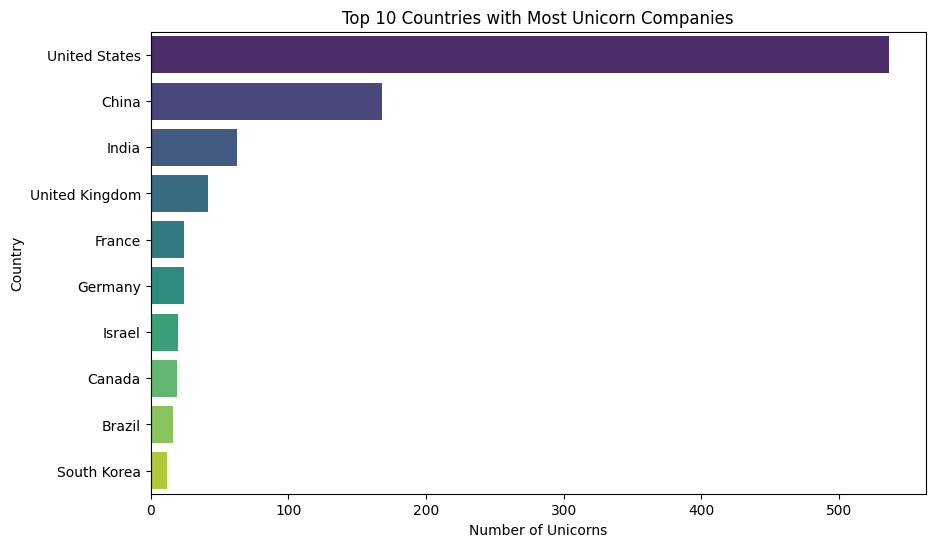

In [11]:
# 1. Distribution by Country
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Unicorn Companies')
plt.xlabel('Number of Unicorns')
plt.ylabel('Country')
plt.show()

### 2. Distribution by City
The bar chart below shows the top 10 cities with the highest number of unicorn companies. San Francisco leads the list, showcasing its dominance as a global hub for innovation and startups, particularly in technology and software. New York follows, reflecting its strength in finance, e-commerce, and media industries. Beijing and Shanghai represent China's major contributions to the unicorn landscape, driven by their vast markets, government support, and strong tech ecosystems.

<ipython-input-12-b55ce0787f35>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='plasma')


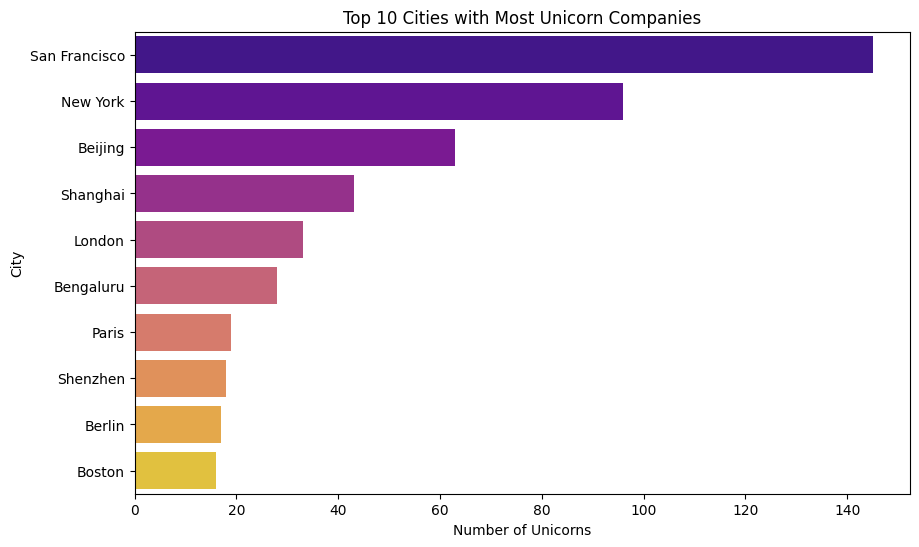

In [12]:
# 2. Distribution by City
top_cities = df['City'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='plasma')
plt.title('Top 10 Cities with Most Unicorn Companies')
plt.xlabel('Number of Unicorns')
plt.ylabel('City')
plt.show()

### 3. Distribution by Industry
The bar chart below highlights the top industries with the most unicorn companies. Fintech takes the top spot, reflecting the rapid growth of financial technology innovations like digital payments, lending, and blockchain. Artificial Intelligence (AI) comes next, driven by advancements in machine learning and its applications across various fields. Health is in third place, showcasing the increasing focus on health-tech and biotech startups, especially post-pandemic. Supply Chain, Logistics, and Delivery rank fourth, reflecting the surge in e-commerce and the need for efficient delivery systems.

<ipython-input-13-37aada1fa015>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_industries.values, y=top_industries.index, palette='magma')


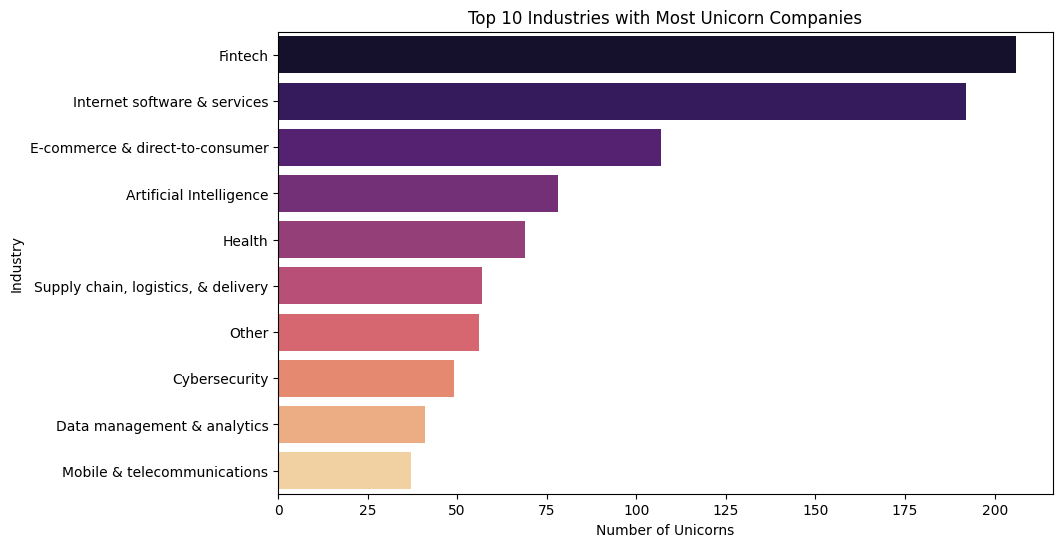

In [13]:
# 3. Distribution by Industry
# Replace the inconsistent industry names
df['Industry'] = df['Industry'].replace({
    'Finttech': 'Fintech',
    'Artificial intelligence': 'Artificial Intelligence'
})

top_industries = df['Industry'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_industries.values, y=top_industries.index, palette='magma')
plt.title('Top 10 Industries with Most Unicorn Companies')
plt.xlabel('Number of Unicorns')
plt.ylabel('Industry')
plt.show()

### 4. Valuation Statistics
The valuation statistics below reveal that there are 1,037 unicorn companies in the dataset, with an average valuation of 3.05 billion. However, most unicorns are clustered at the lower end, as the median valuation is 1 billion, and 75% of companies are valued at 3 billion or less. The minimum valuation is 1 billion, which is the threshold for unicorn status, while the highest valuation is 140 billion, highlighting the impact of outliers. The standard deviation of $7.32 billion indicates a wide range of valuations, driven by a few highly-valued companies like ByteDance and SpaceX. This suggests that while most unicorns are entry-level in terms of valuation, a small number achieve extraordinary market success.

In [14]:
# 4. Valuation Statistics
valuation_stats = df['Valuation ($B)'].describe()
print("Valuation Statistics:\n", valuation_stats)

Valuation Statistics:
 count   1,037.00
mean        3.05
std         7.32
min         1.00
25%         1.00
50%         1.00
75%         3.00
max       140.00
Name: Valuation ($B), dtype: float64


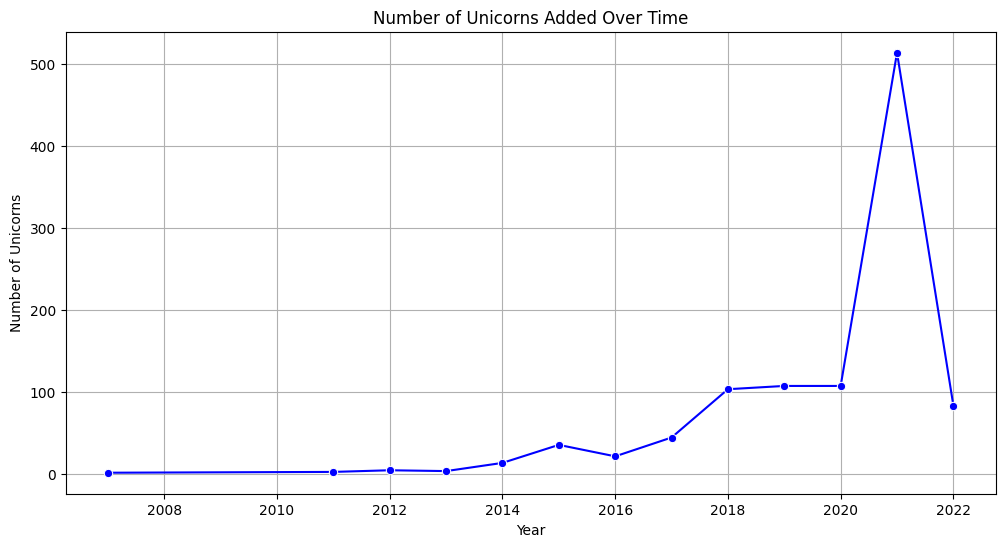

In [15]:
# 5. Trend of Unicorns Over Time
unicorn_trend = df.groupby('Year Joined').size()
plt.figure(figsize=(12, 6))
sns.lineplot(x=unicorn_trend.index, y=unicorn_trend.values, marker='o', color='blue')
plt.title('Number of Unicorns Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.grid(True)
plt.show()

### 6. Active Investors
The bar chart highlights the top 10 most active investors in unicorn companies. Accel leads as the most active investor, showcasing its extensive involvement across multiple industries and startups, emphasizing its strong network and strategic investment approach. Tiger Global Management follows closely, known for its aggressive investment style and focus on high-growth companies. Sequoia Capital ranks third, reflecting its legacy as a prominent player in venture capital, consistently backing transformative startups. Andreessen Horowitz takes the fourth spot, underlining its expertise in identifying innovative opportunities, particularly in tech-focused industries.

<ipython-input-16-419847565312>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=investors.values, y=investors.index, palette='coolwarm')


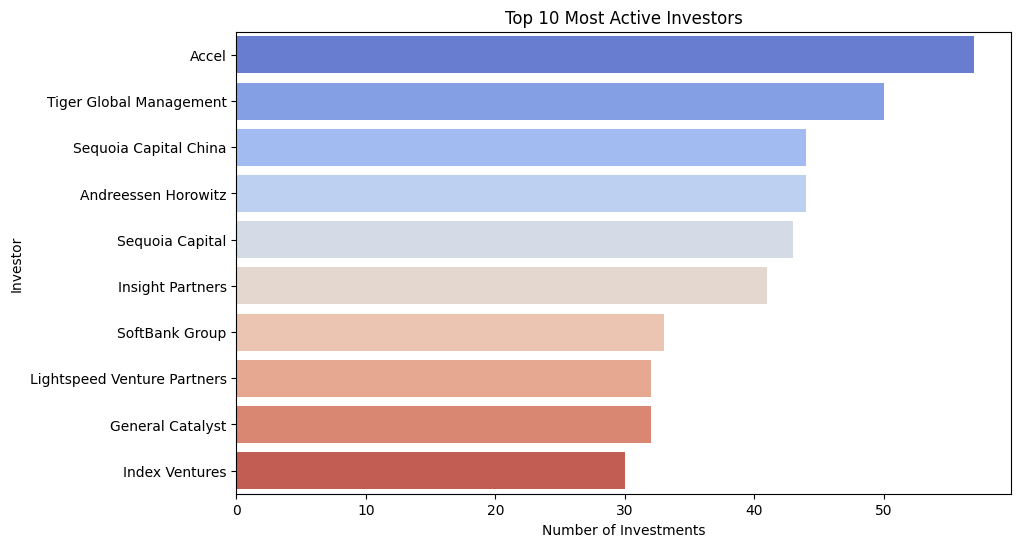

In [16]:
# 6. Active Investors
investors = df['Select Inverstors'].str.split(', ', expand=True).stack().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=investors.values, y=investors.index, palette='coolwarm')
plt.title('Top 10 Most Active Investors')
plt.xlabel('Number of Investments')
plt.ylabel('Investor')
plt.show()

### 7. Compare Total Raised and Number of Investors
A noticeable feature of the plot is a dense horizontal line at 0, which likely represents companies with a single or very few investors. This suggests that a subset of unicorns has achieved high valuations with minimal investor involvement, potentially indicating significant early investments or strong individual backers.

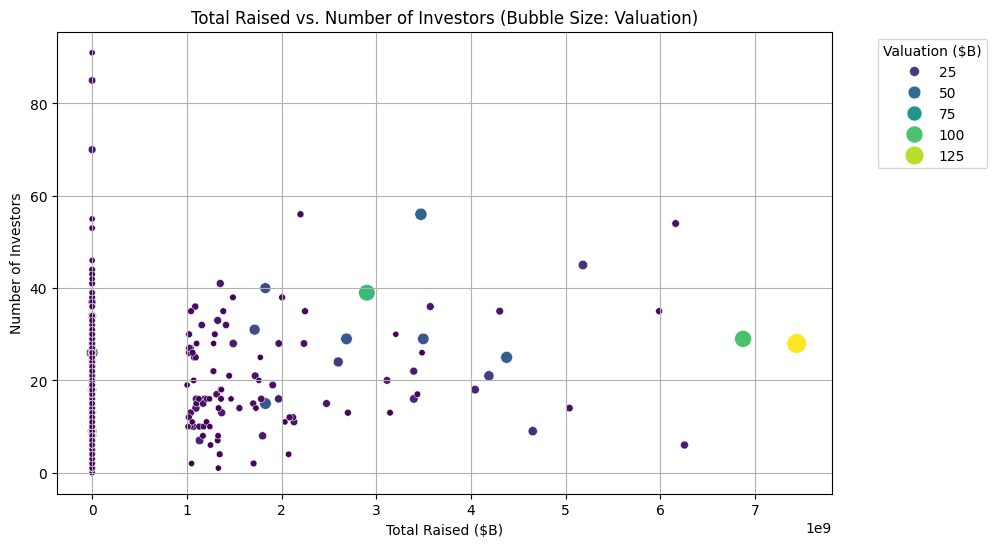

In [17]:
# 7. Compare Total Raised and Number of Investors
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total Raised', y='Investors Count', hue='Valuation ($B)', size='Valuation ($B)', sizes=(20, 200), palette='viridis')
plt.title('Total Raised vs. Number of Investors (Bubble Size: Valuation)')
plt.xlabel('Total Raised ($B)')
plt.ylabel('Number of Investors')
plt.legend(title='Valuation ($B)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### 8. Valuation Distribution

The distribution of unicorn company valuations reveals that most are clustered at the lower end, typically around 1 to 10 billion, with a clear right-skewed pattern. This highlights that many unicorns just cross the $1 billion valuation threshold, which is the minimum to achieve unicorn status.

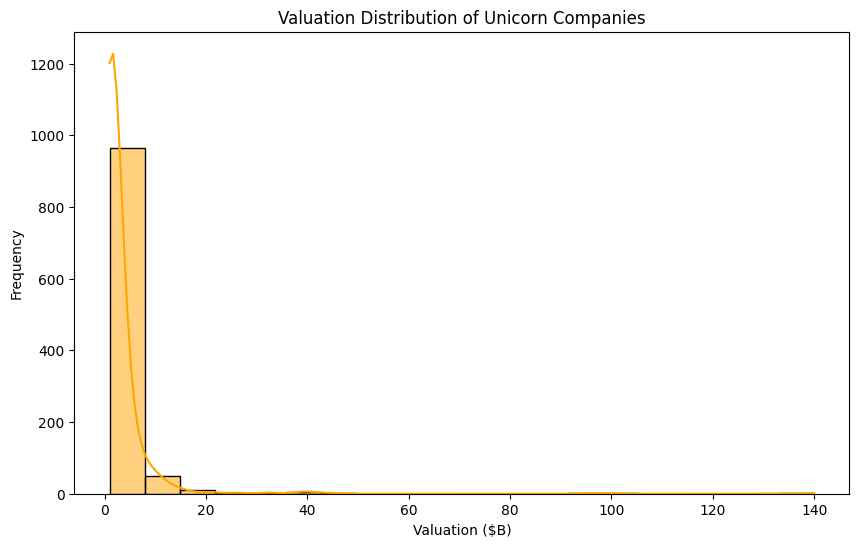

In [18]:
# 8. Valuation Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Valuation ($B)'], kde=True, color='orange', bins=20)
plt.title('Valuation Distribution of Unicorn Companies')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.show()

### 9. Correlation Analysis
The correlation analysis shows some interesting connections between the numbers. Valuation and total funds raised have a moderate positive link (0.6), meaning that companies that raise more money often have higher valuations, but it’s not the only factor. The number of investors and portfolio exits have almost no connection (0.09), so having more investors doesn’t seem to impact how often a company successfully exits. There’s also a weak link (0.25) between total funds raised and the number of investors, suggesting that while raising more money might bring in more investors, it’s not a strong trend.

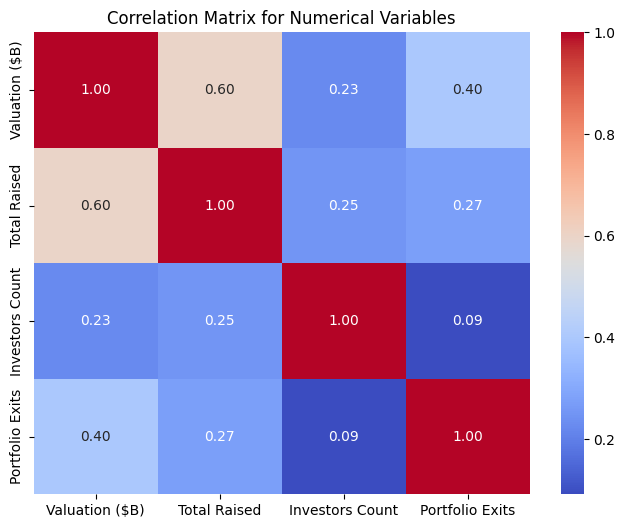

In [19]:
# 9. Correlation Analysis
# Correlation matrix
correlation_matrix = df[['Valuation ($B)', 'Total Raised', 'Investors Count', 'Portfolio Exits']].corr()

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

### 10. Financial Stage Analysis
The comparison of financial stage with valuation shows that while valuations vary across stages, companies in stages like "IPO" or "acquired" tend to show higher valuation ranges. The presence of "unknown" as a dominant category might dilute insights into valuation by stage, highlighting a need for better data clarity in this space.

<ipython-input-20-e329413883ff>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=financial_stage_counts.index, y=financial_stage_counts.values, palette='Set2')


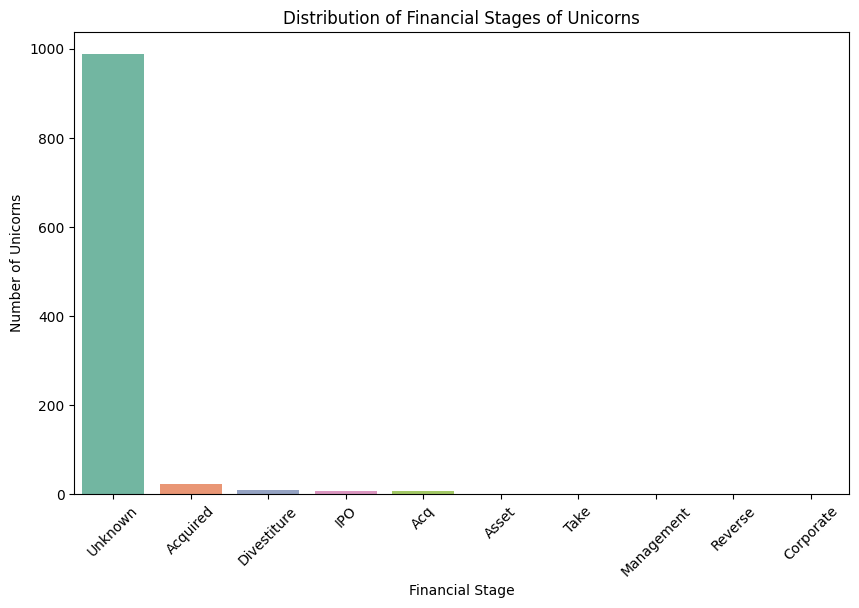

<ipython-input-20-e329413883ff>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Financial Stage', y='Valuation ($B)', palette='pastel')


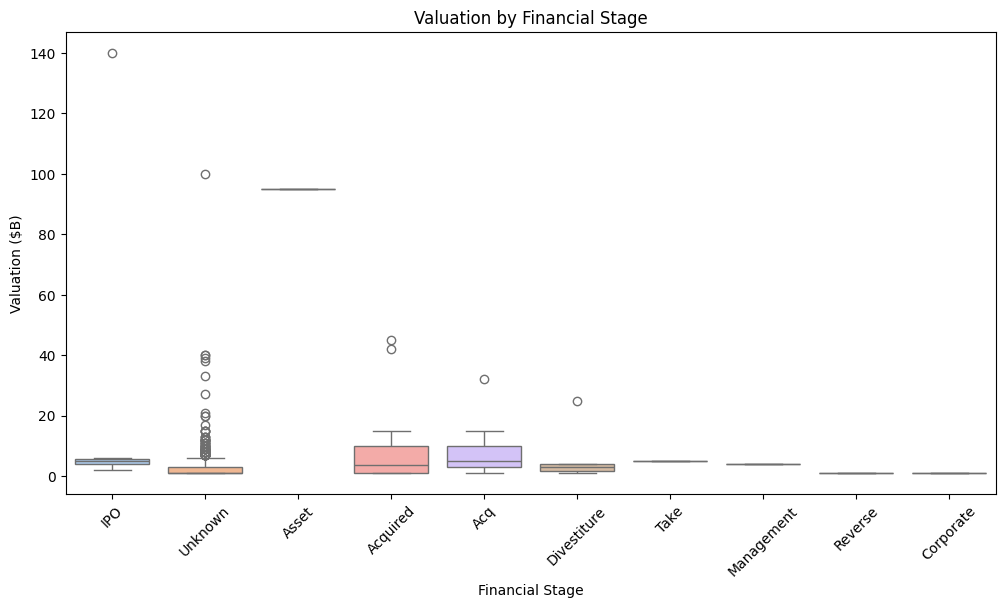

In [20]:
# 10. Financial Stage Analysis
# Plotting financial stage distribution
financial_stage_counts = df['Financial Stage'].value_counts().dropna()
plt.figure(figsize=(10, 6))
sns.barplot(x=financial_stage_counts.index, y=financial_stage_counts.values, palette='Set2')
plt.title('Distribution of Financial Stages of Unicorns')
plt.xlabel('Financial Stage')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=45)
plt.show()

# Compare financial stage with valuation
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Financial Stage', y='Valuation ($B)', palette='pastel')
plt.title('Valuation by Financial Stage')
plt.xlabel('Financial Stage')
plt.ylabel('Valuation ($B)')
plt.xticks(rotation=45)
plt.show()

### 11. Unicorns by Industry and Country
The heatmap reveals the distribution of unicorn companies across industries and countries, highlighting key patterns. The United States dominates across nearly all industries, especially in Fintech, Artificial Intelligence, and Internet softwares and services, showcasing its diverse and advanced startup ecosystem. China also stands out with a strong focus on Artificial Intelligence and Supply Chain Logistics & Delivery, reflecting its emphasis on technology and infrastructure. Countries like India and the UK make notable contributions, particularly in Fintech, signaling the growth of their emerging startup ecosystems. Globally, the heatmap shows that industries such as Fintech and Artificial Intelligence are consistently strong, indicating universal demand and opportunity.

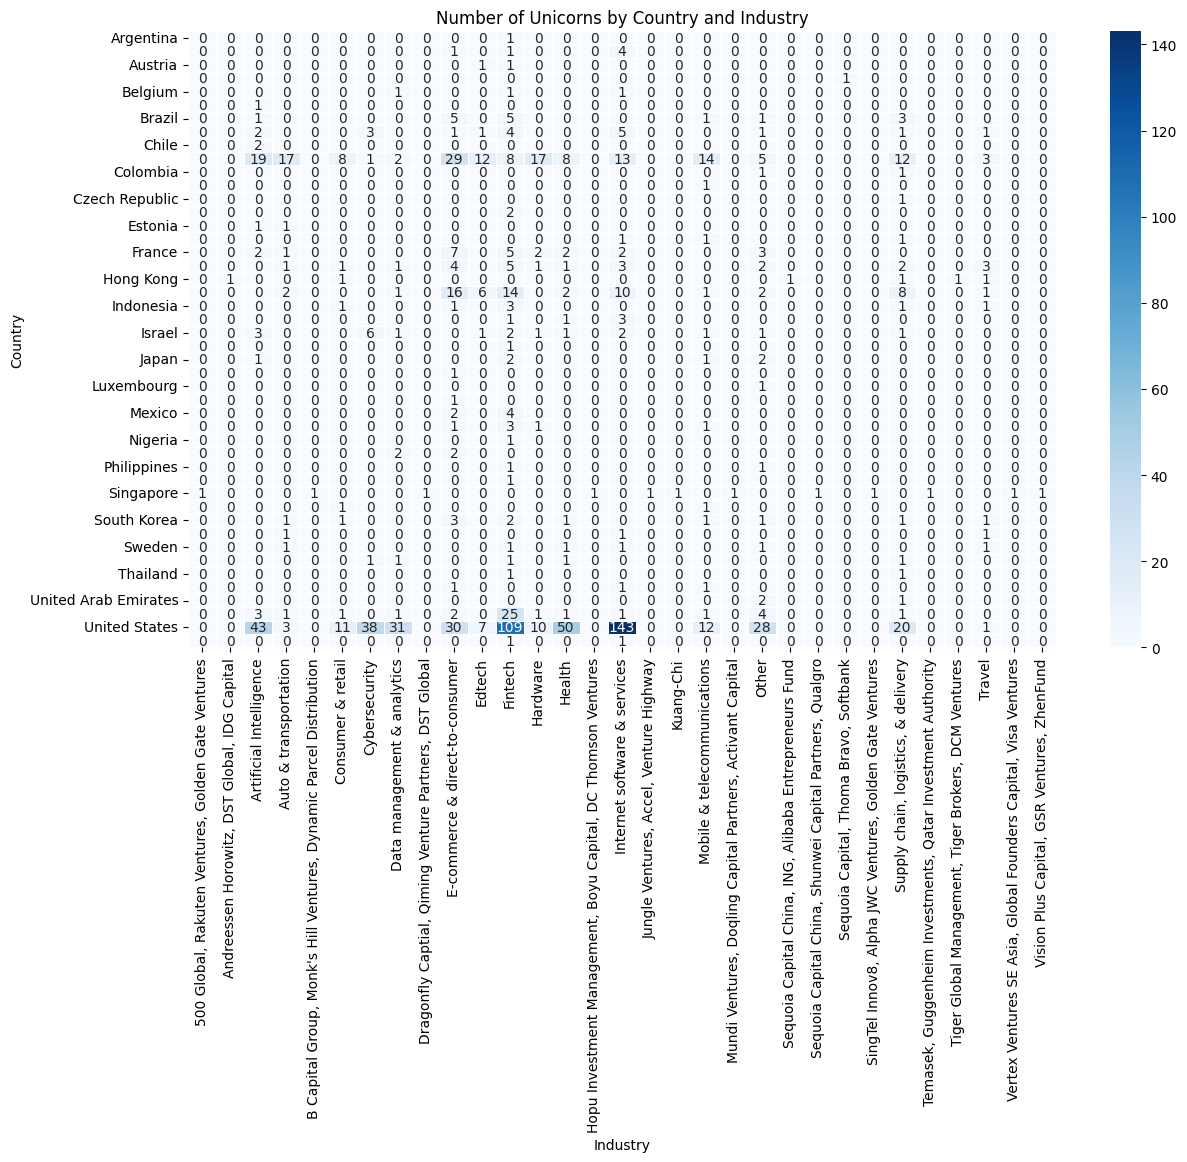

In [21]:
# 11. Unicorns by Industry and Country
# Group by country and industry
industry_country = df.groupby(['Country', 'Industry']).size().unstack(fill_value=0)

# Heatmap of the number of unicorns per country and industry
plt.figure(figsize=(14, 8))
sns.heatmap(industry_country, cmap='Blues', annot=True, fmt='d', linewidths=0.5)
plt.title('Number of Unicorns by Country and Industry')
plt.xlabel('Industry')
plt.ylabel('Country')
plt.show()

### 12. Time to Reach Unicorn Status
The distribution of the "Years to Reach Unicorn Status" is right-skewed, with the peak occurring around 5 years. This suggests that most unicorns achieve their 1 billion valuation relatively quickly, within about 5 years of their founding. The right skew indicates that while the majority of companies reach unicorn status within a short period, there are a few outliers that take much longer. These companies could be exceptional cases, either taking more time to scale or going through unique growth trajectories before reaching the 1 billion milestone.

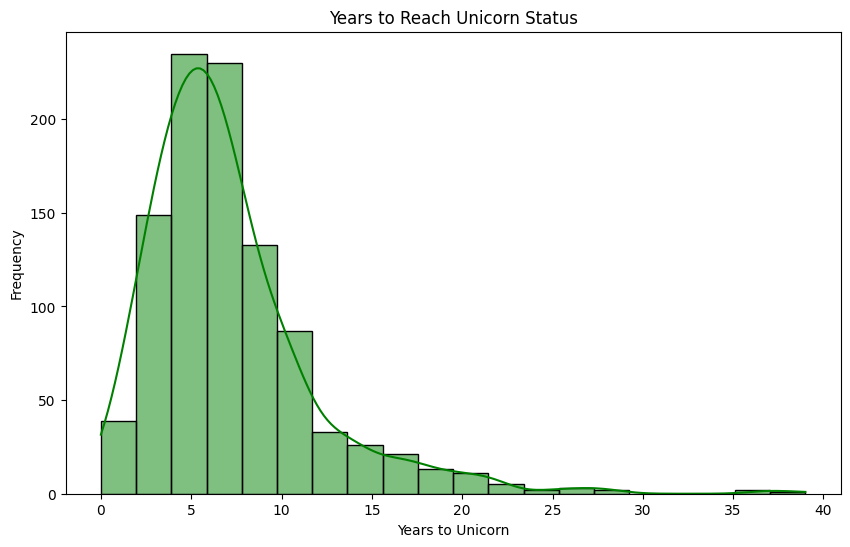

In [32]:
# 12. Time to Reach Unicorn Status
# Filter out unrealistic values (e.g., negative or greater than 50 years)
df['Years to Unicorn'] = df['Year Joined'] - df['Founded Year']
df = df[df['Years to Unicorn'].between(0, 50)]

# Replot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Years to Unicorn'], kde=True, bins=20, color='green')
plt.title('Years to Reach Unicorn Status')
plt.xlabel('Years to Unicorn')
plt.ylabel('Frequency')
plt.show()

### 13. Unicorns with the Most/Least Investors
The right skew suggests that while the majority of unicorns tend to have a smaller group of investors, a few unicorns are backed by a much larger network of investors. This could indicate that some unicorns are able to attract more diverse or strategic investor groups, likely due to their rapid growth, high valuation, or sector demand- The concentration of investors around the lower end (0 to 10) may reflect that many unicorns tend to rely on fewer investors, possibly a select group of venture capitalists or institutional backers, compared to those with large numbers of investors.

Company with most investors: Company            Turing
Investors Count        91
Name: 765, dtype: object
Company with least investors: Company            Fair
Investors Count       0
Name: 680, dtype: object


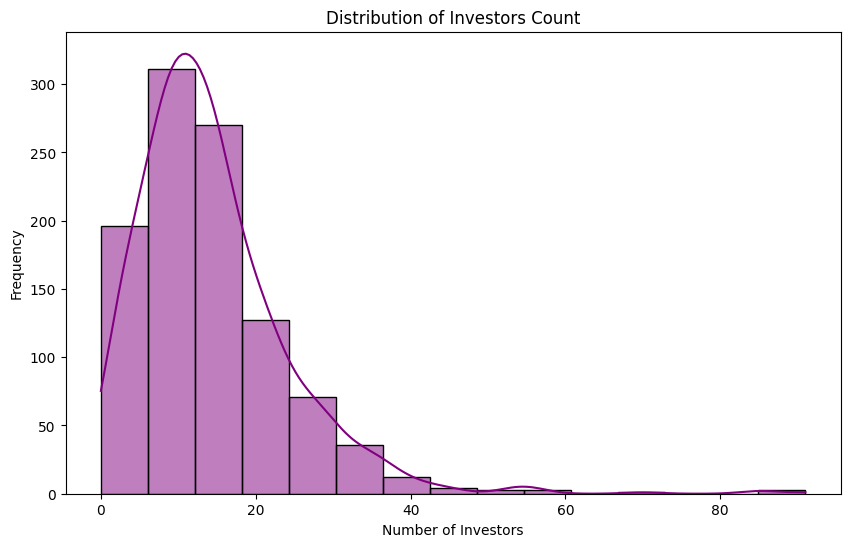

In [23]:
# 13. Unicorns with the Most/Least Investors
# Companies with most and least investors
most_investors = df.loc[df['Investors Count'].idxmax()]
least_investors = df.loc[df['Investors Count'].idxmin()]

print("Company with most investors:", most_investors[['Company', 'Investors Count']])
print("Company with least investors:", least_investors[['Company', 'Investors Count']])

# Visualize the distribution of investors count
plt.figure(figsize=(10, 6))
sns.histplot(df['Investors Count'], kde=True, bins=15, color='purple')
plt.title('Distribution of Investors Count')
plt.xlabel('Number of Investors')
plt.ylabel('Frequency')
plt.show()

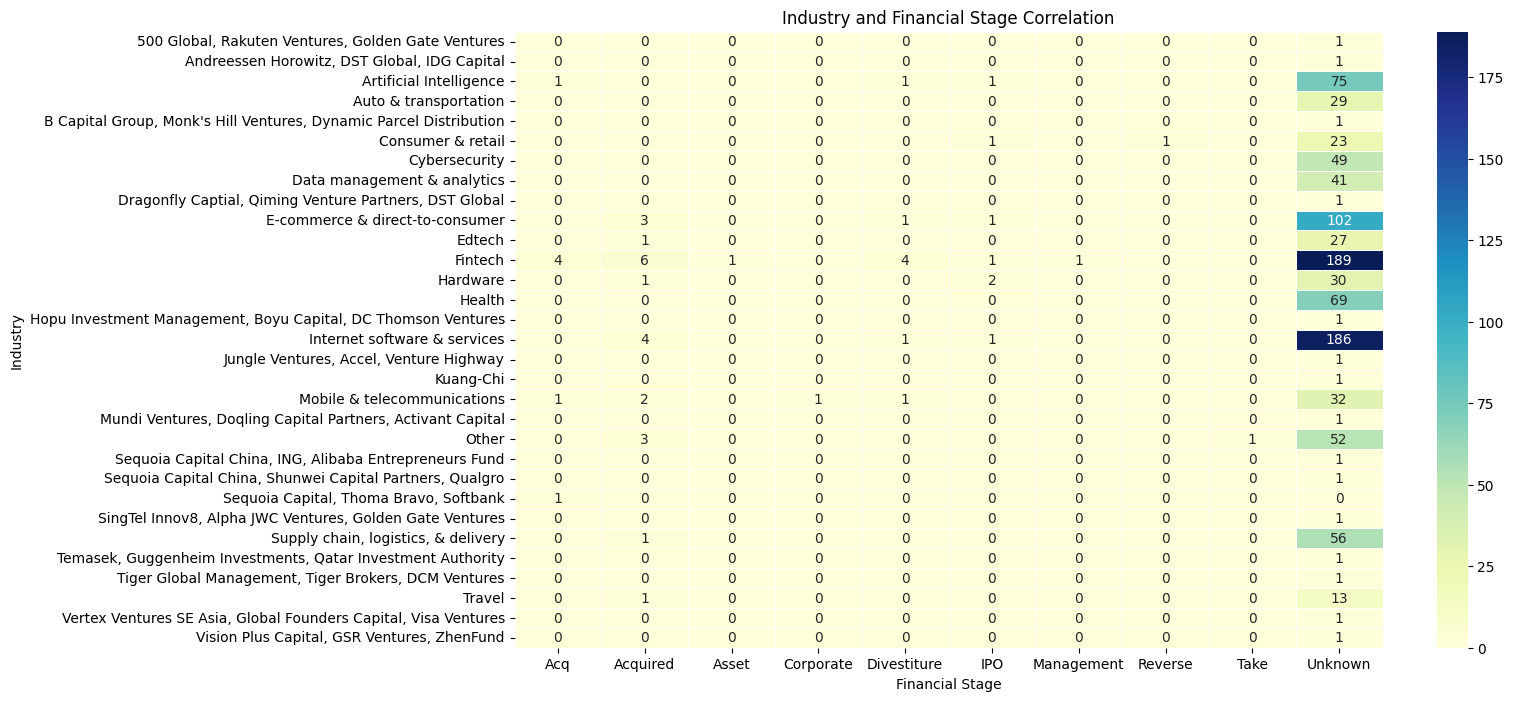

In [24]:
# 14. Industry and Financial Stage Correlation
# Group by industry and financial stage
industry_stage = df.groupby(['Industry', 'Financial Stage']).size().unstack(fill_value=0)

# Heatmap visualization
plt.figure(figsize=(14, 8))
sns.heatmap(industry_stage, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Industry and Financial Stage Correlation')
plt.xlabel('Financial Stage')
plt.ylabel('Industry')
plt.show()

# 3. Industry Trends and Insights

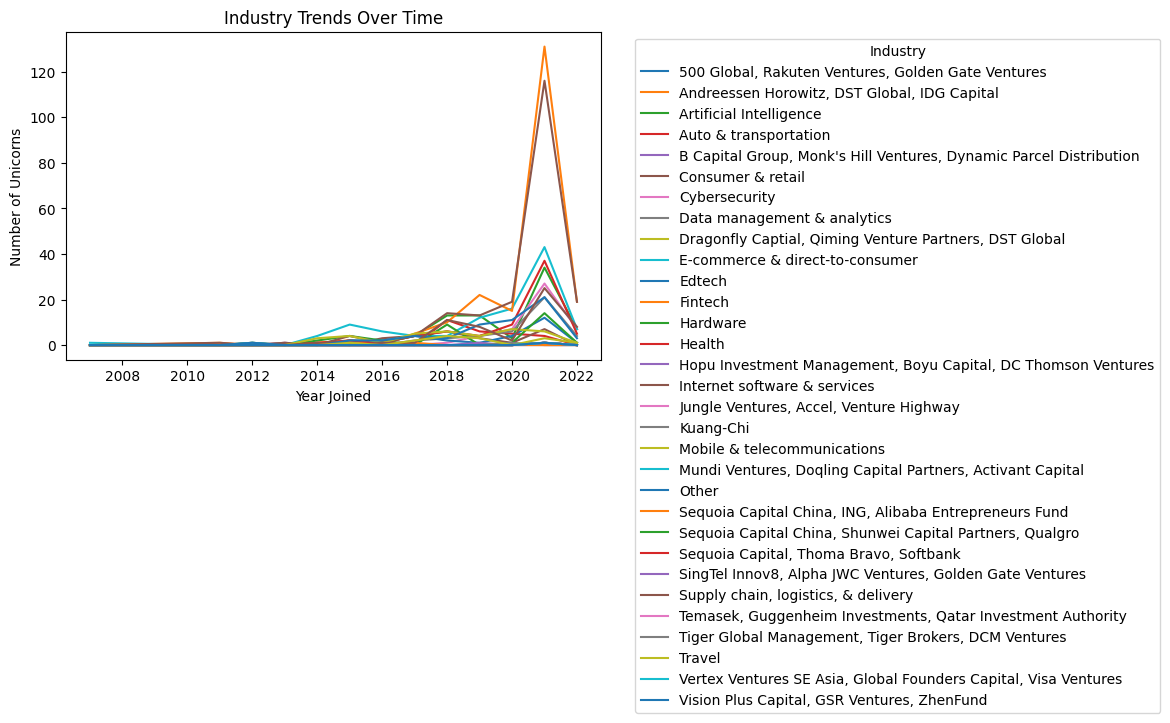

In [25]:
# 15. Industry trends overtime
industry_trends = df.groupby(['Year Joined', 'Industry']).size().unstack(fill_value=0)

# Plot the data, with each industry as a separate line
ax = industry_trends.plot(kind='line', figsize=(12, 6))

# Set titles and labels
plt.title('Industry Trends Over Time')
plt.ylabel('Number of Unicorns')
plt.xlabel('Year Joined')

# Move the legend outside the plot
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to ensure nothing is cut off
plt.tight_layout()

# Show the plot
plt.show()

In [26]:
# 16. High Valuation Investors
# Split 'Select Investors' by commas and explode into separate rows
df_exploded = df.assign(Investors=df['Select Inverstors'].str.split(',')).explode('Investors')

# Clean up whitespace and remove any extra spaces
df_exploded['Investors'] = df_exploded['Investors'].str.strip()

# Count the number of occurrences for each investor
investor_counts = df_exploded['Investors'].value_counts()

# Display the top investors
print(investor_counts.head())


Investors
Accel                      57
Tiger Global Management    50
Sequoia Capital China      44
Andreessen Horowitz        44
Sequoia Capital            43
Name: count, dtype: int64


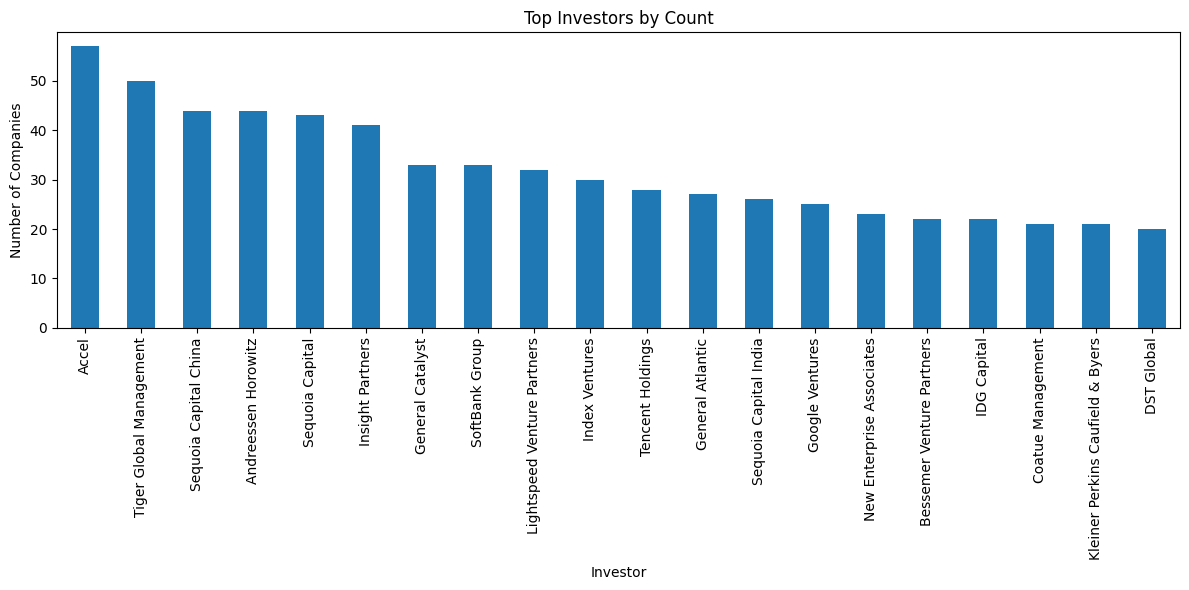

In [27]:
# Plot the investor counts as a bar chart
plt.figure(figsize=(12, 6))
investor_counts.head(20).plot(kind='bar')  # Show top 20 investors
plt.title('Top Investors by Count')
plt.xlabel('Investor')
plt.ylabel('Number of Companies')
plt.xticks(rotation=90)  # Rotate labels to fit them better
plt.tight_layout()
plt.show()

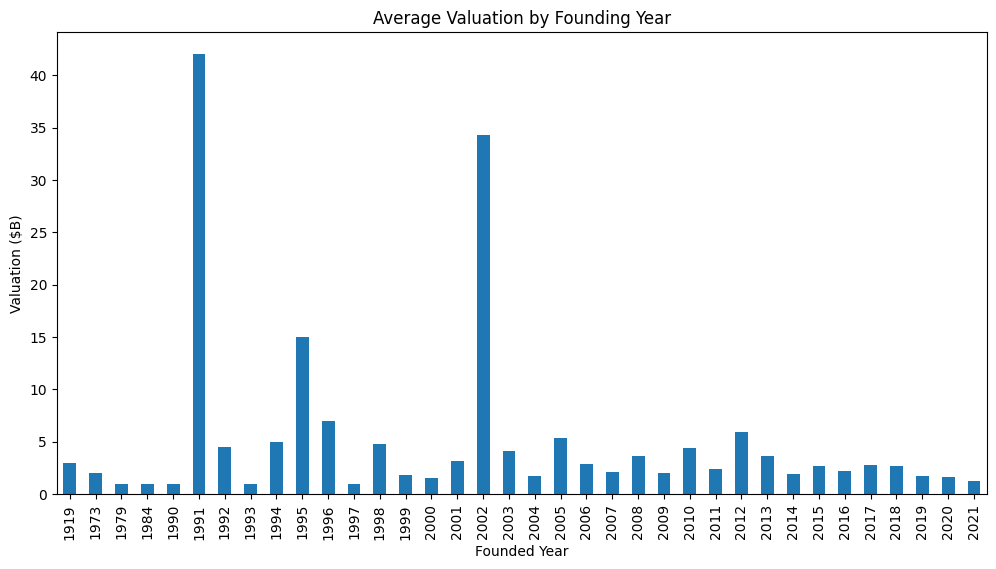

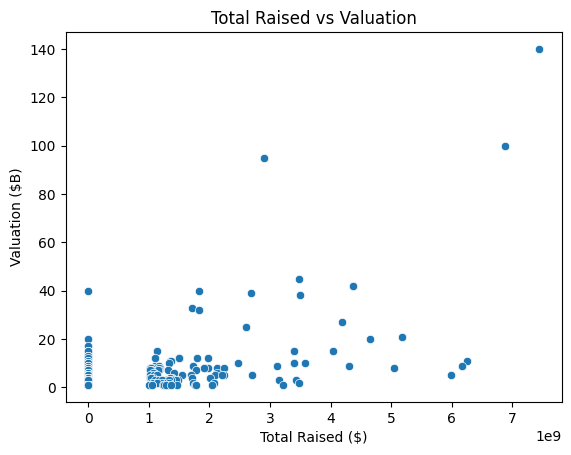

In [28]:
# 17. Success Factors
# Average valuation by founding year
avg_valuation_by_year = df.groupby('Founded Year')['Valuation ($B)'].mean()
df_cleaned = df[df['Founded Year'] > 0].dropna(subset=['Founded Year'])

# Now you can proceed with the calculation for average valuation by founding year
avg_valuation_by_year = df_cleaned.groupby('Founded Year')['Valuation ($B)'].mean()

# Plot
avg_valuation_by_year.plot(kind='bar', figsize=(12, 6))
plt.title('Average Valuation by Founding Year')
plt.ylabel('Valuation ($B)')
plt.xlabel('Founded Year')
plt.show()

# Correlation between Total Raised and Valuation
sns.scatterplot(x='Total Raised', y='Valuation ($B)', data=df)
plt.title('Total Raised vs Valuation')
plt.xlabel('Total Raised ($)')
plt.ylabel('Valuation ($B)')
plt.show()


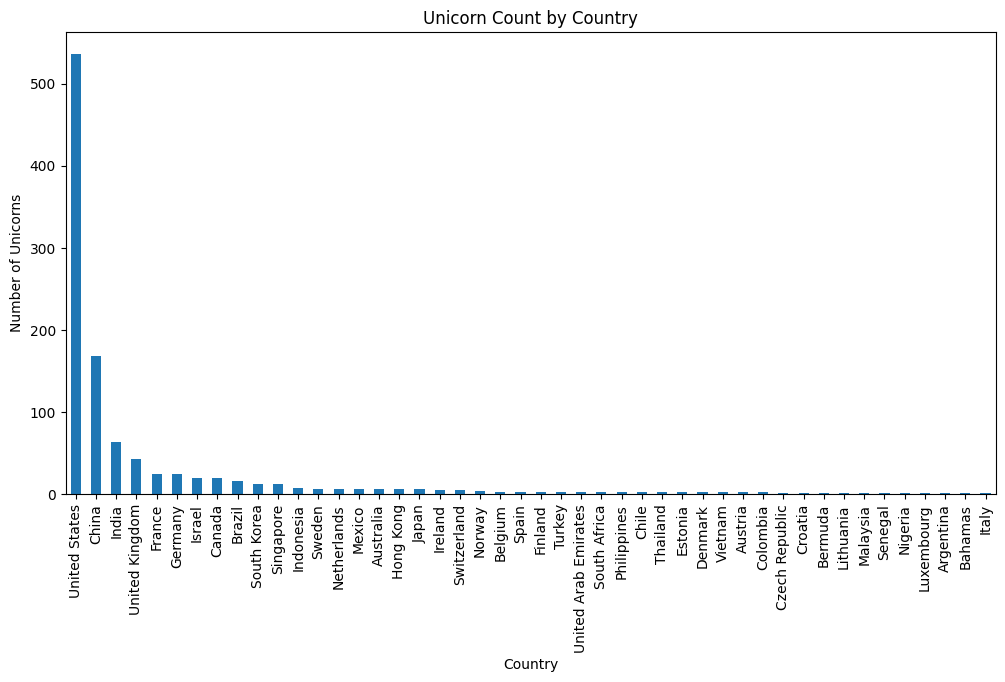

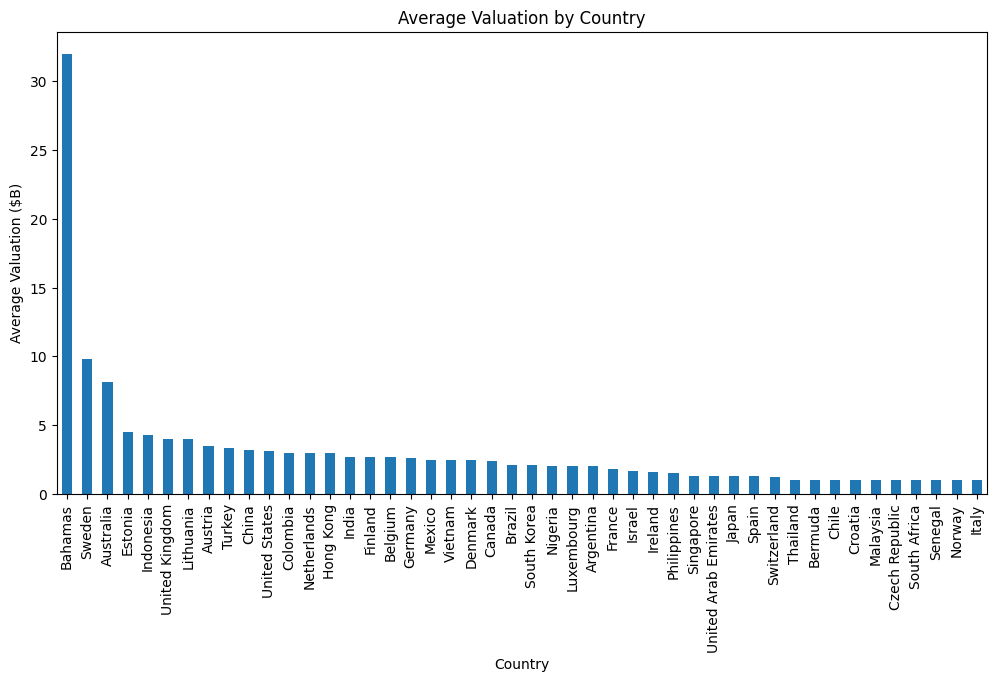

In [29]:
# 18. Geaographical Factors
# Count of unicorns by country
country_counts = df['Country'].value_counts()

# Bar plot
country_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Unicorn Count by Country')
plt.ylabel('Number of Unicorns')
plt.xlabel('Country')
plt.show()

# Average valuation by country
avg_valuation_by_country = df.groupby('Country')['Valuation ($B)'].mean()

# Bar plot
avg_valuation_by_country.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Average Valuation by Country')
plt.ylabel('Average Valuation ($B)')
plt.xlabel('Country')
plt.show()

In [30]:
# Top 10 highest-valued companies
top_valued = df.nlargest(10, 'Valuation ($B)')

# Top 10 by funds raised
top_funds_raised = df.nlargest(10, 'Total Raised')

print("Top 10 Valued Companies:\n", top_valued[['Company', 'Valuation ($B)']])
print("Top 10 Companies by Funds Raised:\n", top_funds_raised[['Company', 'Total Raised']])


Top 10 Valued Companies:
         Company  Valuation ($B)
0     Bytedance             140
1        SpaceX             100
2        Stripe              95
3        Klarna              45
4    Epic Games              42
5         Canva              40
6  Checkout.com              40
7     Instacart              39
8    Databricks              38
9       Revolut              33
Top 10 Companies by Funds Raised:
                 Company  Total Raised
0             Bytedance    7440000000
1                SpaceX    6874000000
35        Global Switch    6255000000
54            Northvolt    6162000000
131            WM Motor    5987000000
13               BYJU's    5183000000
67   Xingsheng Selected    5040000000
15          J&T Express    4653000000
4            Epic Games    4377000000
56            Chehaoduo    4304000000


# 4. Predictive Modelling

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Prepare data for modeling
df['Financial Stage'] = LabelEncoder().fit_transform(df['Financial Stage'])
df['Industry'] = LabelEncoder().fit_transform(df['Industry'])
df['Country'] = LabelEncoder().fit_transform(df['Country'])

# Features and target
X = df[['Founded Year', 'Total Raised', 'Industry', 'Country', 'Financial Stage']]
y = df['Valuation ($B)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate
print("Model Score:", model.score(X_test, y_test))

Model Score: 0.24605789471897277


A score of 0.246 suggests that the model only explains around 24.6% of the variance in the target variable. This means there is still 75.4% of the variance that the model is not able to capture, which indicates poor model performance.

I would do the following: feature engineering, using more advanced models, tuning hyperparameters, and validating the data quality but this project was a test of my knowledge to this extent. I hope you were able to learn new things!